# Reinforcement learning for generating music

Inspired by [this](https://deepmind.com/blog/article/learning-to-generate-images) article of deepmind, we want to try to train an agent to generate music.
When humans create music, they neither generate pure waveforms or spectrograms, instead, they choose a couple of sounds or instruments and experiment on a higher level with them. Midi data is a good abstraction for this.
We can try to mimic this process by having an agent generate the chords, and simultanously training a discriminator. The agents reward will be the log likelihood that $D$ predicts about being music.


Code structure:

Discriminator:
    - transform (midi -> mel spectro)
    - predict
    - train on batch
    - Models:
        - conv net
        - lstm
        - transformer
        
    

Environment:
    - step
    - reset
    - render
    - close
    
Agent:
    - next chord
    
    
midi -> wav -> mel -> D

Agent -> y -> midi 
    


## Code structure

In [1]:
class Discriminator():
    """Base class for neural nets that learn to discriminate
    generated midi from real midi data
    """
    
    def predict(self, sequence):
        """
        Gets:
            sequence: List of midi events, single sample
        Returns:
            q: float, log likelihood of the sequence being real
        """
        pass
    
    def train_on_batch(self, sequences):
        """
        Gets:
            sequences: List of midi sequences
        """
        pass
    
    @staticmethod
    def __transform(sequence):
        """
        Gets a sequence and generates a mel spectrogram
        which can be used for the neural net input
        """
        pass

In [2]:
class Agent():
    def reset(self):
        """Clear the memory of the agent to start generating
        a new song
        """
        pass
    
    def next_action(self, observation):
        pass

In [3]:
import gym


class Environment(gym.Env):
    def __init__(self):
        super().__init__()
#         # Define action and observation space
#         # They must be gym.spaces objects
#         # Example when using discrete actions:
#         self.action_space = spaces.Discrete(N_DISCRETE_ACTIONS)
#         # Example for using image as input:
#         self.observation_space = spaces.Box(low=0, high=255,
#                                             shape=(HEIGHT, WIDTH, N_CHANNELS), dtype=np.uint8)

    def step(self, action):
        return observation, reward, done, info

    def reset(self):
        return observation  # reward, done, info can't be included

    def render(self, mode='human'):
        pass
    
    def close (self):
        pass

In [4]:
class Training():
    def __init__(self, data, env, agent):
        pass

# Getting and inspecting the dataset

In [5]:
# !wget https://storage.googleapis.com/magentadata/datasets/maestro/v2.0.0/maestro-v2.0.0-midi.zip
# !unzip maestro-v2.0.0-midi.zip

In [6]:
ls maestro-v2.0.0

2004/                2013/                LICENSE
2006/                2014/                README
2008/                2015/                maestro-v2.0.0.csv
2009/                2017/                maestro-v2.0.0.json
2011/                2018/


In [7]:
import pandas as pd

df = pd.read_csv('maestro-v2.0.0/maestro-v2.0.0.csv')

In [8]:
df

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
0,Alban Berg,Sonata Op. 1,train,2018,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,698.661160
1,Alban Berg,Sonata Op. 1,train,2008,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,759.518471
2,Alban Berg,Sonata Op. 1,train,2017,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,464.649433
3,Alexander Scriabin,"24 Preludes Op. 11, No. 13-24",train,2004,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,872.640588
4,Alexander Scriabin,"3 Etudes, Op. 65",validation,2006,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,397.857508
...,...,...,...,...,...,...,...
1277,Wolfgang Amadeus Mozart,"Sonata in F Major, K280",test,2004,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,241.470442
1278,Wolfgang Amadeus Mozart,"Sonata in F Major, K280",train,2004,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,114.696243
1279,Wolfgang Amadeus Mozart,"Sonata in F Major, K533",validation,2004,2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORI...,2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORI...,1139.198478
1280,Wolfgang Amadeus Mozart,"Sonata in F Major, K533/K494",validation,2018,2018/MIDI-Unprocessed_Recital17-19_MID--AUDIO_...,2018/MIDI-Unprocessed_Recital17-19_MID--AUDIO_...,1068.751602


In [9]:
# from __future__ import print_function

# import numpy as np
# import pretty_midi
# import tensorflow as tf


# def piano_roll_sequences(filenames, batch_size, sequence_size, rate=100):
#     """Returns a dataset of piano roll sequences from the given files.."""

#     def _to_piano_roll(filename, sequence_size):
#         """Load a file and return consecutive piano roll sequences."""
#         try:
#             midi = pretty_midi.PrettyMIDI(tf.compat.as_text(filename))
#         except Exception:
#             print("Skipping corrupt MIDI file", filename)
#             return np.zeros([0, sequence_size, 128], dtype=np.bool)
#         roll = np.asarray(midi.get_piano_roll(rate).transpose(), dtype=np.bool)
#         assert roll.shape[1] == 128
#         # Pad the roll to a multiple of sequence_size
#         length = len(roll)
#         remainder = length % sequence_size
#         if remainder:
#             new_length = length + sequence_size - remainder
#             roll = np.resize(roll, (new_length, 128))
#             roll[length:, :] = False
#             length = new_length
#         return np.reshape(roll, (length // sequence_size, sequence_size, 128))

#     def _to_piano_roll_dataset(filename):
#         """Filename (string scalar) -> Dataset of piano roll sequences."""
#         sequences, = tf.py_function(_to_piano_roll,
#                                 [filename, sequence_size],
#                                 [tf.bool])
#         sequences.set_shape([None, None, 128])
#         return tf.data.Dataset.from_tensor_slices(sequences)

#     batch_size = tf.cast(batch_size, tf.int64)
#     return (tf.data.Dataset.from_tensor_slices(filenames)
#             .interleave(_to_piano_roll_dataset,
#                         cycle_length=batch_size * 5,
#                         block_length=1)
#             .repeat()
#             .shuffle(1000)
#             .batch(batch_size))


# def piano_roll_to_midi(piano_roll, sample_rate):
#     """Convert the piano roll to a PrettyMIDI object.
#     See: http://github.com/craffel/examples/reverse_pianoroll.py
#     """
#     midi = pretty_midi.PrettyMIDI()
#     instrument = pretty_midi.Instrument(0)
#     midi.instruments.append(instrument)
#     padded_roll = np.pad(piano_roll, [(1, 1), (0, 0)], mode='constant')
#     changes = np.diff(padded_roll, axis=0)
#     notes = np.full(piano_roll.shape[1], -1, dtype=np.int)
#     for tick, pitch in zip(*np.where(changes)):
#         prev = notes[pitch]
#         if prev == -1:
#             notes[pitch] = tick
#             continue
#         notes[pitch] = -1
#         instrument.notes.append(pretty_midi.Note(
#             velocity=100,
#             pitch=pitch,
#             start=prev / float(sample_rate),
#             end=tick / float(sample_rate)))
#     return midi


# def write_test_note(path, duration, note):
#     midi = pretty_midi.PrettyMIDI()
#     instrument = pretty_midi.Instrument(0)
#     instrument.notes.append(pretty_midi.Note(100, note, 0.0, duration))
#     midi.instruments.append(instrument)
#     midi.write(path)

# Pretty Midi

Resources:
https://nbviewer.jupyter.org/github/craffel/pretty-midi/blob/master/Tutorial.ipynb

Instruments
- How many instruments do the samples have? -> 1
- What information is there about each instruments?
    - Notes
    - Control changes
    - Pitch bends -> We dont have it

In [10]:

import pretty_midi
from glob import glob
samples = [pretty_midi.PrettyMIDI(i) for i in glob('maestro-v2.0.0/2008/**.midi')]

## Visualizing

We can plot the notes being played per sample

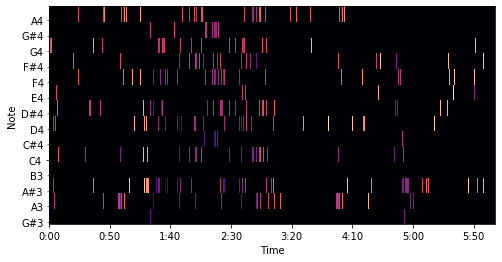

In [18]:
import librosa.display

def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

plt.figure(figsize=(8, 4))
plot_piano_roll(samples[0], 56, 70)

## Listen to it

In [38]:
from IPython.display import display, Audio

def midi2wav(sample):
    """Generate an in-memory wav file from a PrettyMidi object
    Gets:
        sample: PrettMidi object
    Returns:
        data: np.array with 1 dimension, waveform
        rate: int, sample rate
    """
    pass


def listen_to(sample):
    """Create a audio player that renders a PrettyMidi object"""
    data, rate = midi2wav(sample)
    display(Audio(data=data, rate=rate))

## Instruments

In [11]:
# How many instruments per sample?
num_instruments = [len(sample.instruments) for sample in samples]
min(num_instruments), max(num_instruments)

(1, 1)

## Notes

In [12]:
# Notes of one instrument
sorted(samples[0].instruments[0].notes, key = lambda a: a.start)

[Note(start=0.921875, end=1.520833, pitch=70, velocity=52),
 Note(start=0.976562, end=1.018229, pitch=62, velocity=33),
 Note(start=1.424479, end=1.635417, pitch=69, velocity=66),
 Note(start=1.592448, end=2.010417, pitch=67, velocity=66),
 Note(start=1.600260, end=1.645833, pitch=63, velocity=58),
 Note(start=2.019531, end=2.082031, pitch=69, velocity=65),
 Note(start=2.178385, end=2.217448, pitch=70, velocity=64),
 Note(start=2.186198, end=2.220052, pitch=61, velocity=55),
 Note(start=2.335938, end=2.388021, pitch=69, velocity=68),
 Note(start=2.480469, end=2.515625, pitch=67, velocity=73),
 Note(start=2.766927, end=2.805990, pitch=62, velocity=70),
 Note(start=2.774740, end=2.807292, pitch=65, velocity=67),
 Note(start=3.057292, end=3.104167, pitch=62, velocity=73),
 Note(start=3.192708, end=3.227865, pitch=59, velocity=69),
 Note(start=3.348958, end=3.408854, pitch=63, velocity=70),
 Note(start=3.364583, end=3.403646, pitch=60, velocity=67),
 Note(start=3.486979, end=3.562500, pitc

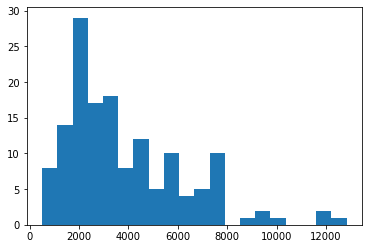

In [39]:
# Number of notes per file
from matplotlib import pyplot as plt
plt.hist([len(sample.instruments[0].notes) for sample in samples], bins=20)
plt.show()

## Pitch bends
Since MIDI notes are all defined to have a specific integer pitch value, in order to represent arbitrary pitch frequencies we need to use pitch bends. A PitchBend class in pretty_midi holds a time (in seconds) and a pitch offset. The pitch offset is an integer in the range [-8192, 8191], which in General MIDI spans the range from -2 to +2 semitones. As with Notes, the Instrument class has a list for PitchBend class instances.

In [14]:
[len(sample.instruments[0].pitch_bends) for sample in samples]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Our dataset doesn't contain it, so we will ignore this

## Control Changes

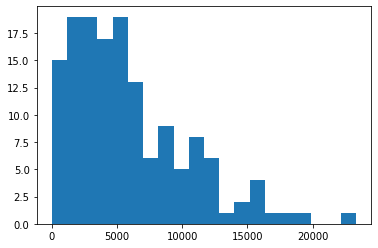

In [15]:
# Number of control changes per file
plt.hist([len(sample.instruments[0].control_changes) for sample in samples], bins=20)
plt.show()

In [16]:
sorted(samples[0].instruments[0].control_changes, key=lambda a: a.time)

[ControlChange(number=64, value=0, time=0.000000),
 ControlChange(number=67, value=0, time=0.000000),
 ControlChange(number=64, value=10, time=4.182292),
 ControlChange(number=64, value=42, time=4.201823),
 ControlChange(number=64, value=47, time=4.220052),
 ControlChange(number=64, value=50, time=4.240885),
 ControlChange(number=64, value=52, time=4.260417),
 ControlChange(number=64, value=53, time=4.291667),
 ControlChange(number=64, value=54, time=4.311198),
 ControlChange(number=64, value=53, time=4.330729),
 ControlChange(number=64, value=53, time=4.350260),
 ControlChange(number=64, value=52, time=4.369792),
 ControlChange(number=64, value=51, time=4.389323),
 ControlChange(number=64, value=49, time=4.408854),
 ControlChange(number=64, value=46, time=4.428385),
 ControlChange(number=64, value=38, time=4.449219),
 ControlChange(number=64, value=18, time=4.470052),
 ControlChange(number=64, value=0, time=4.490885),
 ControlChange(number=64, value=13, time=5.350260),
 ControlChange(

What does the value mean? Should we use one hot encoding or use the numerical value?
-> https://www.midi.org/specifications-old/item/table-3-control-change-messages-data-bytes-2

Number is a categorical feature, value is a numerical feature.

In [34]:
sample_control_changes_values = [i.value for i in samples[0].instruments[0].control_changes]
sorted(set(sample_control_changes_values))

[0,
 10,
 13,
 15,
 17,
 18,
 20,
 21,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127]

In [37]:
tmp = [[i.number for i in sample.instruments[0].control_changes] for sample in samples]
sample_control_changes_number = [item for sublist in tmp for item in sublist]
sorted(set(sample_control_changes_number))

[64, 66, 67]

In [27]:
samples[0].get_piano_roll(100).max()

113.0

## Midi vector Mapper class

Summarizing, we got:
- One istrument per song in our piano dataset
- Notes that look like this Note(start=3.192708, end=3.227865, pitch=59, velocity=69)
    - What does velocity mean?
- Control changes that have a categorical feature (number) and a numerical value
    - In our dataset, only a few different control numbers occur. So for one hot encoding, we should use only as many dimensions as different numbers occur, which is why the mapper should be dataset dependent
- No pitch bends

How should we encode it?
- Sequence of events, ordered by time
- Notes:
    - Encode duration vs end
    - Encode absolute start vs offset since last vs offset relative to rythm?
    
Should the one hot encoding -> midi category be a deterministic mapping (`[0.1, 0.5, 0.4] -> 1`) or a probabilistic mapping( $P(c | onehot) = onehot[c]$ )?

In [ ]:
class MidiVectorMapper():
    """Map a PrettyMIDI object to a sequence of vectors and back.
    For single instrument midi tracks only.
    Gets:
        - dataset: List of PrettyMIDI objects, to check for the categorical features, which features exist
    """
    def __init__(self, samples):
        """
        Dimensions:
            0: time
            1: is_note
            For notes only:
            2: pitch
            3: velocity
            4: duration
            For control changes only:
            5: value
            6-?: one hot encoding for control number
        """
        tmp = [[i.number for i in sample.instruments[0].control_changes] for sample in samples]
        sample_control_changes_number = [item for sublist in tmp for item in sublist]
        self.control_change_categories = sorted(set(sample_control_changes_number))
        self.dims = None
    
    def midi2vec(self, sample):
        """Map a PrettyMIDI object to a sequence of vectors
        """
        pass
    
    def vec2midi(self, seq):
        """Map a vector to a PrettyMIDI object with a single piano
        
        """
        pass